## 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [4]:
df = pd.read_csv('data/Galton.txt', sep = '\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 전처리
    - 아버지와 아들의 키만 발췌
    - 컬럼명을 Father, Son으로 변경
    - 단위(1 inch = 2.54 cm) 변경

In [7]:
df = df[df['Gender'] == 'M']
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [8]:
# selection
df = df[['Father', 'Height']]

# 컬럼명 변경

df.columns = ['Father', 'Son']
df.tail(3)

,Father,Son
892,68.5,68.7
893,68.5,68.5
894,68.5,67.7


In [9]:
# 단위 변경
df = df * 2.54
df.tail(3)

,Father,Son
892,173.99,174.498
893,173.99,173.990
894,173.99,171.958


- 산점도

- 회귀선

In [12]:
weight, bias = np.polyfit(df['Father'], df['Son'], deg=1)       # X, Y, degree(차수)
weight, bias

(0.4477479176030235, 97.1776370073937)

In [13]:
np.polyfit(df['Father'], df['Son'], 2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [14]:
# X 축의 최소값, 최댓값
df['Father'].min(), df['Father'].max()

(157.48, 199.39000000000001)

In [15]:
# 회귀선(직선)
xs = np.array([df['Father'].min(), df['Father'].max()])
ys = weight * xs + bias
ys

array([167.68897907, 186.4540943 ])

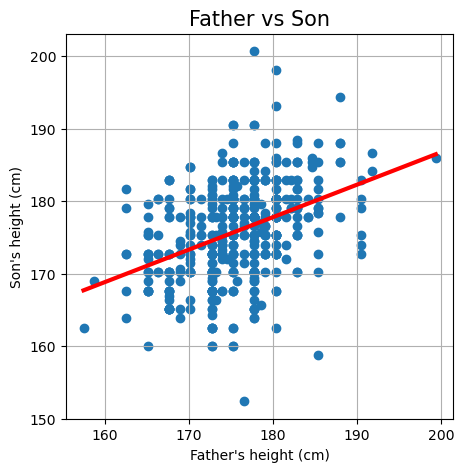

In [16]:
plt.figure(figsize=(5, 5))
plt.scatter(df['Father'], df['Son'])
plt.plot(xs, ys, c='red', lw=3)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.grid()
plt.show()

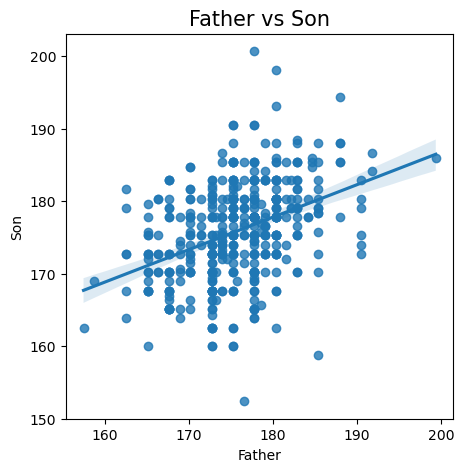

In [20]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Father', y='Son', data=df)
plt.title('Father vs Son', fontsize=15)
plt.show()

- Scikit-Learn으로 회귀식 구하기

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [23]:
# 학습
lr.fit(df[['Father']], df['Son'])       # X 값은 2차원이 되어야 함

LinearRegression()

In [24]:
X = df['Father'].values.reshape(-1, 1)
y = df['Son'].values
lr.fit(X, y)

LinearRegression()

In [27]:
# weight, bias
print(lr.coef_, lr.intercept_)
print(weight, bias)

[0.44774792] 97.17763700739347
0.4477479176030235 97.1776370073937


- 평가 - R squared

In [28]:
lr.score(X, y)

0.1531292747830697

In [29]:
from sklearn.metrics import r2_score

y_hat = lr.predict(X)
r2_score(y, y_hat)

0.1531292747830697

In [31]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_hat)

37.75612799030966